In [1]:
import pandas as pd

In [2]:
# read in CSV file from current directory, while setting rows as indices
data = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
# show first 5 rows
# tv, radio, newspaper are the features
# sales is response variable
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

In [5]:
# regression problem b/c response variable is continuous
import seaborn as sns

In [6]:
# magic command? allows to plot viz inline
%matplotlib inline

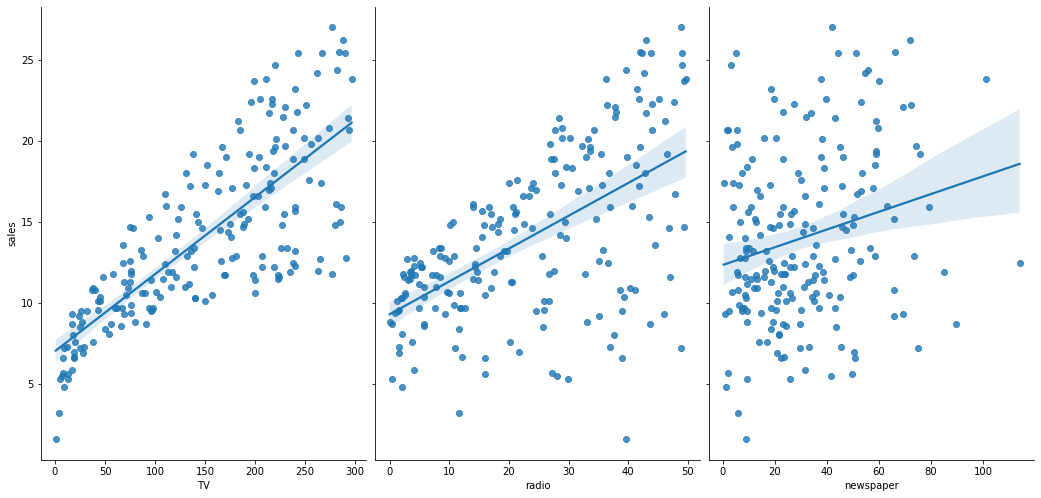

In [7]:
# using seaborn, visualize the relationship between features and the response
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

In [8]:
# create list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# select subset of orginal df
X = data[feature_cols]

# print first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
# select series "Sales" from df
y = data['sales']

# print first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [10]:
# check the shape, and want 1D array here
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [11]:
# splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# default for split between training and testing is 3/4 and 1/4
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [13]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
# instantiation of LinearRegression class
linreg = LinearRegression()

In [15]:
# fit the model to training data using fit()
linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
# printing the intercept and coefficients from linreg object
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [17]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('radio', 0.17915812245088839),
 ('newspaper', 0.003450464711180378)]

In [18]:
# make prediction on the test set
y_pred = linreg.predict(X_test)

In [19]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [20]:
# calculate mean absolute error by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [21]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [22]:
# computing RMSE for sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


# **Feature Selection (Creation of new model)**

In [23]:
# create Python list of feature names
feature_cols = ['TV', 'radio']

In [24]:
# use feature_cols list to select a subset of columns from original data
X = data[feature_cols]

In [25]:
# selecting response variable
y = data.sales

**a**

In [32]:
# displaying last 5 rows of data for X
X.tail()

,TV,radio
196,38.2,3.7
197,94.2,4.9
198,177.0,9.3
199,283.6,42.0
200,232.1,8.6


In [33]:
# displaying last 5 rows of data for y
y.tail()

196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, dtype: float64

In [26]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

**b**

In [34]:
# displaying shape of data for X train and test
print(X_train.shape)
print(X_test.shape)

(150, 2)
(50, 2)


In [37]:
# displaying shape of data for y train and test
print(y_train.shape)
print(y_test.shape)

(150,)
(50,)


In [27]:
# fit the model to the training data
linreg.fit(X_train, y_train)

LinearRegression()

**c**

In [38]:
# printing the intercept and coefficients from linreg object
print(linreg.intercept_)
print(linreg.coef_)

# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

2.9272373202664816
[0.04660234 0.18117959]


[('TV', 0.04660234071076855), ('radio', 0.18117959203112896)]

In [28]:
# make predictions on the test set
y_pred = linreg.predict(X_test)

**d**

In [29]:
# compute RMSE (we want to minimize this)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886
